<a href="https://colab.research.google.com/github/fbghkh1999/data-preprocessing-visualization/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
smartphones=pd.read_csv('/content/smartphones.csv')
smartphones.head()

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7


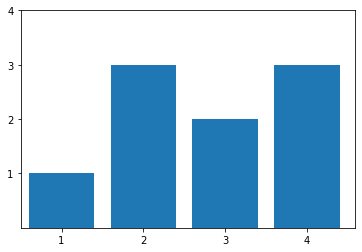

In [3]:
y=smartphones.Ram.value_counts()
x=y.index
plt.bar(y.index,y)
plt.xticks([1,2,3,4])
plt.yticks([1,2,3,4])
plt.xlim(0.5)

plt.show()

In [4]:
np.var(smartphones.Ram)

1.0617283950617284

In [5]:
np.std(smartphones.Ram)

1.0304020550550783

In [6]:
smartphones.corr()

,Capacity,Ram,Weight,inch
Capacity,1.000000,0.358820,-0.157874,-0.067892
Ram,0.358820,1.000000,0.421847,0.713299
Weight,-0.157874,0.421847,1.000000,0.845716
inch,-0.067892,0.713299,0.845716,1.000000


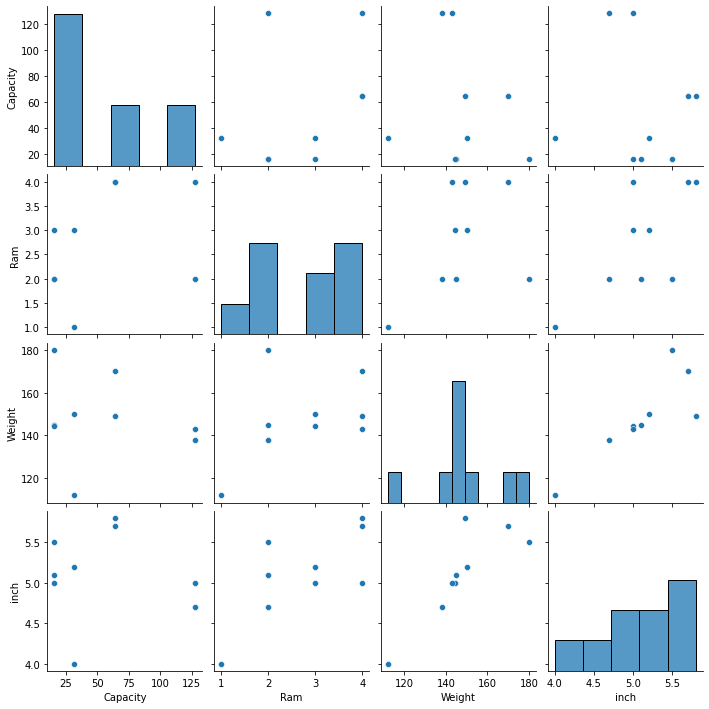

In [7]:
sns.pairplot(smartphones)

,Capacity,Ram,Weight,inch
Capacity,1.000000,0.358820,-0.157874,-0.067892
Ram,0.358820,1.000000,0.421847,0.713299
Weight,-0.157874,0.421847,1.000000,0.845716
inch,-0.067892,0.713299,0.845716,1.000000


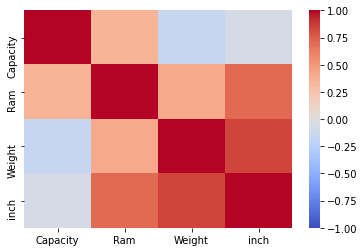

In [14]:
sns.heatmap(smartphones.corr(),cmap='coolwarm',vmin=-1,vmax=+1)
smartphones.corr()

In [11]:
from scipy.stats import pearsonr
pearsonCof,p_value=pearsonr(smartphones.Weight,smartphones.inch)

In [12]:
pearsonCof

0.8457155883705422

In [19]:
from scipy.stats import spearmanr
smartcor=smartphones.drop(['Weight','inch','OS','Name','Company'],axis=1)
spearmanr(smartcor.Capacity,smartcor.Ram)

SpearmanrResult(correlation=0.4419819033287751, pvalue=0.23359832766016075)

In [22]:
pd.get_dummies(smartphones)

,Capacity,Ram,Weight,inch,Name_Galaxy S5,Name_Galaxy S8,Name_Lumia 950,Name_Moto G5,Name_Pixel,Name_U Ultra,Name_Xpreia L1,Name_iphone 5s,Name_iphone 7,OS_Android,OS_ios,OS_windows,Company_Apple,Company_Google,Company_HTC,Company_Microsoft,Company_Motorola,Company_Samsung,Company_Sony
0,64,4,149.0,5.8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,32,3,150.0,5.2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,16,2,180.0,5.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,128,2,138.0,4.7,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,64,4,170.0,5.7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,16,2,145.0,5.1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,32,1,112.0,4.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
7,16,3,144.5,5.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,128,4,143.0,5.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.preprocessing import  LabelEncoder
label=LabelEncoder()
smartphones.OS=label.fit_transform(smartphones.OS)
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,0,64,4,149.0,Samsung,5.8
1,Lumia 950,2,32,3,150.0,Microsoft,5.2
2,Xpreia L1,0,16,2,180.0,Sony,5.5
3,iphone 7,1,128,2,138.0,Apple,4.7
4,U Ultra,0,64,4,170.0,HTC,5.7
5,Galaxy S5,0,16,2,145.0,Samsung,5.1
6,iphone 5s,1,32,1,112.0,Apple,4.0
7,Moto G5,0,16,3,144.5,Motorola,5.0
8,Pixel,0,128,4,143.0,Google,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


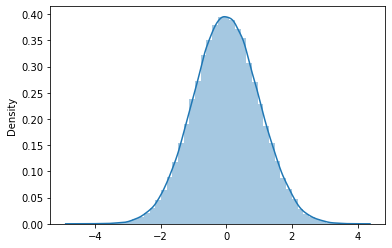

In [9]:
x=np.random.normal(0,1,size=100000)
sns.distplot(x)

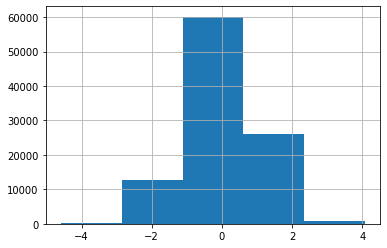

In [24]:
plt.hist(x,bins=5)
plt.grid()
plt.show()

In [28]:
# chi square
from scipy.stats import chi2_contingency
table=pd.crosstab(smartphones.Capacity,smartphones.Ram)
chi2,p_value,dof,expected=chi2_contingency(table.values)
chi2
p_value
expected

array([[0.33333333, 1.        , 0.66666667, 1.        ],
       [0.22222222, 0.66666667, 0.44444444, 0.66666667],
       [0.22222222, 0.66666667, 0.44444444, 0.66666667],
       [0.22222222, 0.66666667, 0.44444444, 0.66666667]])

In [29]:
table.corr()

Ram,1,2,3,4
Ram,,,,
1,1.000000,-0.522233,0.577350,-0.522233
2,-0.522233,1.000000,0.301511,-0.454545
3,0.577350,0.301511,1.000000,-0.904534
4,-0.522233,-0.454545,-0.904534,1.000000
